In [ ]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import matplotlib.pylab as plt
import math
import os 
import seaborn as sns #for styling the plots
import warnings
import urllib.request
%matplotlib inline

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
pip install geopandas

     |████████████████████████████████| 1.0MB 22.7MB/s 
     |████████████████████████████████| 15.3MB 316kB/s 
     |████████████████████████████████| 6.5MB 39.0MB/s 


In [ ]:
pip install pyexcel

     |████████████████████████████████| 92kB 6.3MB/s 
     |████████████████████████████████| 51kB 5.6MB/s 


Combine all SF files

In [ ]:
import time
import os
import pyexcel as px

In [ ]:
directory = "/content/drive/MyDrive/PUIteam/rawbike"

outfile_name = "/content/drive/MyDrive/PUIteam/result_combine.csv"

input_files=os.listdir(directory)

CONTENTS = []

In [ ]:
for filename in input_files:
    if ".csv" not in filename:
        continue

    data_array=px.get_array(file_name=directory + "/" + filename)

    header = data_array[0]
    data_array = data_array[1:]

    if len(CONTENTS) == 0:
        CONTENTS.append(header)

    CONTENTS += data_array

    px.save_as(array=CONTENTS, dest_file_name=outfile_name)
print("process done")

process done


In [144]:
SFall= pd.read_csv('/content/drive/MyDrive/PUIteam/result_combine.csv')

In [145]:
SFall.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,DCFF7274CCC43160,electric_bike,2020-11-06 15:00:35,2020-11-06 15:07:26,NaN,NaN,NaN,NaN,37.77,-122.51,37.76,-122.51,member
1,960CEA623DF863B1,electric_bike,2020-11-09 18:48:02,2020-11-09 19:05:18,NaN,NaN,NaN,NaN,37.79,-122.40,37.77,-122.43,member
2,E1D654DE250A8EC2,electric_bike,2020-11-24 08:09:45,2020-11-24 08:29:43,NaN,NaN,NaN,NaN,37.78,-122.43,37.79,-122.41,casual
3,F50714E7EDD03F99,electric_bike,2020-11-24 13:00:08,2020-11-24 13:25:40,NaN,NaN,NaN,NaN,37.79,-122.49,37.76,-122.47,casual
4,6F8FD01D3AB856D7,electric_bike,2020-11-23 20:21:29,2020-11-23 20:37:35,NaN,NaN,NaN,NaN,37.80,-122.41,37.78,-122.42,casual


In [146]:
SFall.columns

Index(['ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual'],
      dtype='object')

In [147]:
SFall = SFall[['rideable_type', 'started_at', 'ended_at',
       'member_casual']]

In [148]:
SFall.head()

,rideable_type,started_at,ended_at,member_casual
0,electric_bike,2020-11-06 15:00:35,2020-11-06 15:07:26,member
1,electric_bike,2020-11-09 18:48:02,2020-11-09 19:05:18,member
2,electric_bike,2020-11-24 08:09:45,2020-11-24 08:29:43,casual
3,electric_bike,2020-11-24 13:00:08,2020-11-24 13:25:40,casual
4,electric_bike,2020-11-23 20:21:29,2020-11-23 20:37:35,casual


In [149]:
weather= pd.read_csv('/content/drive/MyDrive/PUIteam/weatherSF2020.csv')

In [150]:
weather

,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,DATE,PRCP,TMAX,TMIN
0,USW00023272,"SAN FRANCISCO DOWNTOWN, CA US",37.7705,-122.4269,45.7,1/1/2020,0.0,58,49
1,USW00023272,"SAN FRANCISCO DOWNTOWN, CA US",37.7705,-122.4269,45.7,1/2/2020,0.0,62,48
2,USW00023272,"SAN FRANCISCO DOWNTOWN, CA US",37.7705,-122.4269,45.7,1/3/2020,0.0,60,47
3,USW00023272,"SAN FRANCISCO DOWNTOWN, CA US",37.7705,-122.4269,45.7,1/4/2020,0.0,58,50
4,USW00023272,"SAN FRANCISCO DOWNTOWN, CA US",37.7705,-122.4269,45.7,1/5/2020,0.0,58,45
...,...,...,...,...,...,...,...,...,...
468,USW00023272,"SAN FRANCISCO DOWNTOWN, CA US",37.7705,-122.4269,45.7,4/13/2021,0.0,56,48
469,USW00023272,"SAN FRANCISCO DOWNTOWN, CA US",37.7705,-122.4269,45.7,4/14/2021,0.0,61,48
470,USW00023272,"SAN FRANCISCO DOWNTOWN, CA US",37.7705,-122.4269,45.7,4/15/2021,0.0,57,48
471,USW00023272,"SAN FRANCISCO DOWNTOWN, CA US",37.7705,-122.4269,45.7,4/16/2021,0.0,55,47


In [151]:
from datetime import date, datetime

In [152]:
SFall['started_at'].max()

'2021-02-28 23:59:56'

from July 2020 to Feb 2021

In [154]:
SFall['DATE'] = pd.to_datetime(SFall['started_at']).dt.date
weather['DATE'] = pd.to_datetime(weather['DATE']).dt.date
weather2 = weather.loc[weather['DATE']>= SFall['DATE'].min()]
weather2 = weather2.loc[weather2['DATE']<= SFall['DATE'].max()]
#weather['month'] = weather['DATE'].dt.month
#weather2 = weather.loc[weather['month']==1|2|7|8|9|10|11|12]
#weather2 = weather2.loc[weather2['month'].isin([1,2,7,8,9,10,11,12])]
weather2 = weather2[['DATE', 'PRCP',
       'TMAX', 'TMIN']]
weather2

,DATE,PRCP,TMAX,TMIN
182,2020-07-01,0.0,67,54
183,2020-07-02,0.0,67,54
184,2020-07-03,0.0,62,54
185,2020-07-04,0.0,71,54
186,2020-07-05,0.0,70,56
...,...,...,...,...
420,2021-02-24,0.0,70,48
421,2021-02-25,0.0,64,51
422,2021-02-26,0.0,58,46
423,2021-02-27,0.0,59,44


In [225]:
sf_full['DATE'] = pd.to_datetime(sf_full['started_at'])
weather['DATE'] = pd.to_datetime(weather['DATE'])
weather['month'] = weather['DATE'].dt.month
weatherFeb = weather.loc[weather['month']==2]
weatherFeb = weatherFeb[['DATE', 'PRCP',
       'TMAX', 'TMIN']]
weatherFeb.head()

,DATE,PRCP,TMAX,TMIN
31,2020-02-01,0.0,63,52
32,2020-02-02,0.0,55,45
33,2020-02-03,0.0,55,43
34,2020-02-04,0.0,55,46
35,2020-02-05,0.0,61,44


In [226]:
sf_ebike= SFall.loc[SFall['rideable_type'].isin (['electric_bike'])]
sf_cbike= SFall.loc[SFall['rideable_type'].isin (['classic_bike'])]
sf_dbike= SFall.loc[SFall['rideable_type'].isin (['docked_bike'])]

In [227]:
sf_mbike= SFall.loc[SFall['member_casual'].isin (['member'])]
sf_cabike= SFall.loc[SFall['member_casual'].isin (['casual'])]

In [228]:
member = sf_mbike[['rideable_type','DATE']].groupby(by='rideable_type').count()
member = member.rename(columns={'DATE':'member'}, inplace= False)
member['casual'] = sf_cabike[['DATE','rideable_type']].groupby(by='rideable_type').count()
member

,member,casual
rideable_type,,
classic_bike,58608,46828
docked_bike,106368,113614
electric_bike,303055,444232


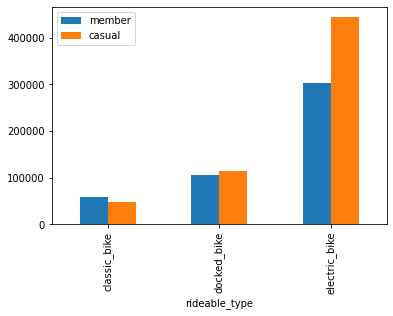

In [229]:
member.plot.bar()

In [230]:
dailycount = SFall[['DATE','rideable_type']].groupby(by='DATE').count()
dailycount = dailycount.rename(columns={'rideable_type':'totalcount'})
dailycount['e-bike'] = sf_ebike[['DATE','rideable_type']].groupby(by='DATE').count()
dailycount['c-bike'] = sf_cbike[['DATE','rideable_type']].groupby(by='DATE').count()
dailycount['d-bike'] = sf_dbike[['DATE','rideable_type']].groupby(by='DATE').count()

dailycount

,totalcount,e-bike,c-bike,d-bike
DATE,,,,
2020-07-01,4698,3307,NaN,1391
2020-07-02,5030,3570,NaN,1460
2020-07-03,5174,3593,NaN,1581
2020-07-04,5847,3929,NaN,1918
2020-07-05,5099,3374,NaN,1725
...,...,...,...,...
2021-02-24,4169,2936,1211.0,22
2021-02-25,4136,2902,1226.0,8
2021-02-26,4413,3149,1241.0,23


In [231]:
import matplotlib.pyplot as plt

In [233]:
dailycount

,totalcount,e-bike,c-bike,d-bike
DATE,,,,
2020-07-01,4698,3307,NaN,1391
2020-07-02,5030,3570,NaN,1460
2020-07-03,5174,3593,NaN,1581
2020-07-04,5847,3929,NaN,1918
2020-07-05,5099,3374,NaN,1725
...,...,...,...,...
2021-02-24,4169,2936,1211.0,22
2021-02-25,4136,2902,1226.0,8
2021-02-26,4413,3149,1241.0,23


In [234]:
dailycount.reset_index(inplace = True)

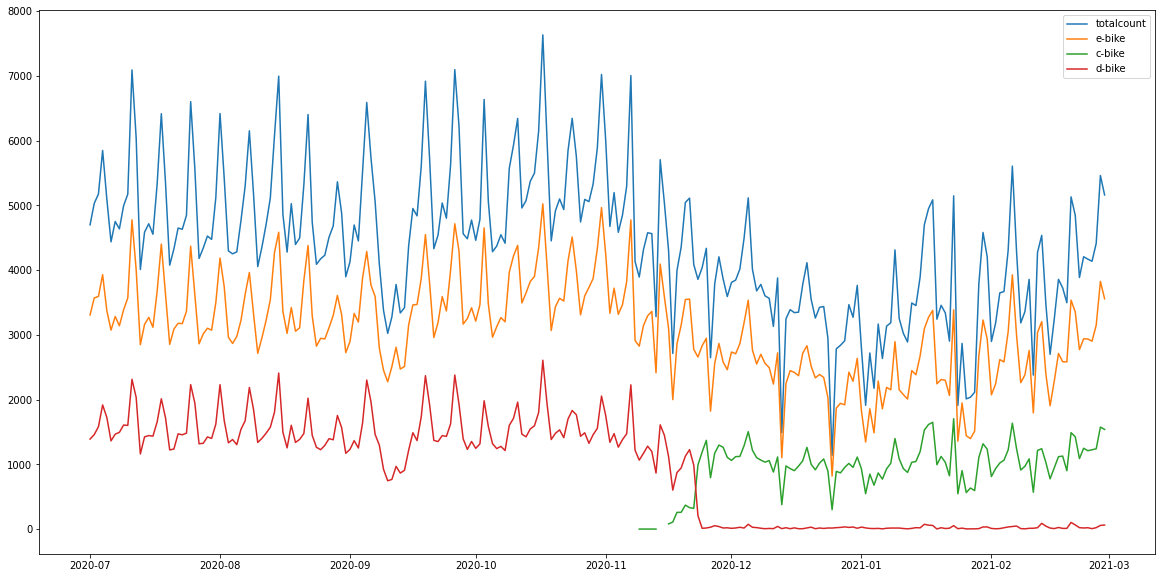

In [278]:
plt.figure(figsize=(20,10))
plt.plot(dailycount['DATE'],dailycount['totalcount'], label='totalcount')
plt.plot(dailycount['DATE'],dailycount['e-bike'],label='e-bike')
plt.plot(dailycount['DATE'],dailycount['c-bike'],label='c-bike')
plt.plot(dailycount['DATE'],dailycount['d-bike'],label='d-bike')
plt.legend();
plt.show()

In [237]:
dailycount['DATE'] = pd.to_datetime(dailycount['DATE'])
dailycount['DATE']

0     2020-07-01
1     2020-07-02
2     2020-07-03
3     2020-07-04
4     2020-07-05
         ...    
238   2021-02-24
239   2021-02-25
240   2021-02-26
241   2021-02-27
242   2021-02-28
Name: DATE, Length: 243, dtype: datetime64[ns]

In [238]:
dailycount['month'] = dailycount['DATE'].dt.month
dailycount['year'] = dailycount['DATE'].dt.year
dailycount['Date'] = pd.to_datetime(dailycount['month'].astype(str) + dailycount['year'].astype(str), format='%m%Y')
dailycount.head()

,DATE,totalcount,e-bike,c-bike,d-bike,month,year,Date
0,2020-07-01,4698,3307,NaN,1391,7,2020,2020-07-01
1,2020-07-02,5030,3570,NaN,1460,7,2020,2020-07-01
2,2020-07-03,5174,3593,NaN,1581,7,2020,2020-07-01
3,2020-07-04,5847,3929,NaN,1918,7,2020,2020-07-01
4,2020-07-05,5099,3374,NaN,1725,7,2020,2020-07-01


In [279]:
weather2['month'] = weather2['DATE'].dt.month
weather2['year'] = weather2['DATE'].dt.year
weather2['Date'] = pd.to_datetime(weather2['month'].astype(str) + weather2['year'].astype(str), format='%m%Y')
weather2.head()

,DATE,PRCP,TMAX,TMIN,month,year,Date
182,2020-07-01,0.0,67,54,7,2020,2020-07-01
183,2020-07-02,0.0,67,54,7,2020,2020-07-01
184,2020-07-03,0.0,62,54,7,2020,2020-07-01
185,2020-07-04,0.0,71,54,7,2020,2020-07-01
186,2020-07-05,0.0,70,56,7,2020,2020-07-01


In [280]:
weather2.columns

Index(['DATE', 'PRCP', 'TMAX', 'TMIN', 'month', 'year', 'Date'], dtype='object')

In [283]:
weathermonthly = weather2[['PRCP', 'TMAX', 'TMIN', 'Date']].groupby(by='Date').mean()
weathermonthly

,PRCP,TMAX,TMIN
Date,,,
2020-07-01,0.000968,66.000000,54.870968
2020-08-01,0.000323,70.064516,56.741935
2020-09-01,0.000000,72.933333,58.133333
2020-10-01,0.000323,73.870968,56.483871
2020-11-01,0.016333,62.900000,49.333333
2020-12-01,0.066774,59.548387,47.225806
2021-01-01,0.090968,58.612903,47.516129
2021-02-01,0.061071,60.821429,47.571429


In [239]:
dailycount.columns

Index(['DATE', 'totalcount', 'e-bike', 'c-bike', 'd-bike', 'month', 'year',
       'Date'],
      dtype='object')

In [240]:
monthlycount = dailycount[['totalcount', 'e-bike', 'c-bike', 'd-bike', 'Date']].groupby(by='Date').sum()
monthlycount

,totalcount,e-bike,c-bike,d-bike
Date,,,,
2020-07-01,155248,106299,0.0,48949
2020-08-01,152690,104414,0.0,48276
2020-09-01,144348,101028,0.0,43320
2020-10-01,167541,118273,0.0,49268
2020-11-01,133020,94021,10931.0,28068
2020-12-01,106422,74710,31074.0,638
2021-01-01,102363,70184,31546.0,633
2021-02-01,111073,78358,31885.0,830


In [267]:
weather2.set_index('DATE')
weather2

,DATE,PRCP,TMAX,TMIN
182,2020-07-01,0.0,67,54
183,2020-07-02,0.0,67,54
184,2020-07-03,0.0,62,54
185,2020-07-04,0.0,71,54
186,2020-07-05,0.0,70,56
...,...,...,...,...
420,2021-02-24,0.0,70,48
421,2021-02-25,0.0,64,51
422,2021-02-26,0.0,58,46
423,2021-02-27,0.0,59,44


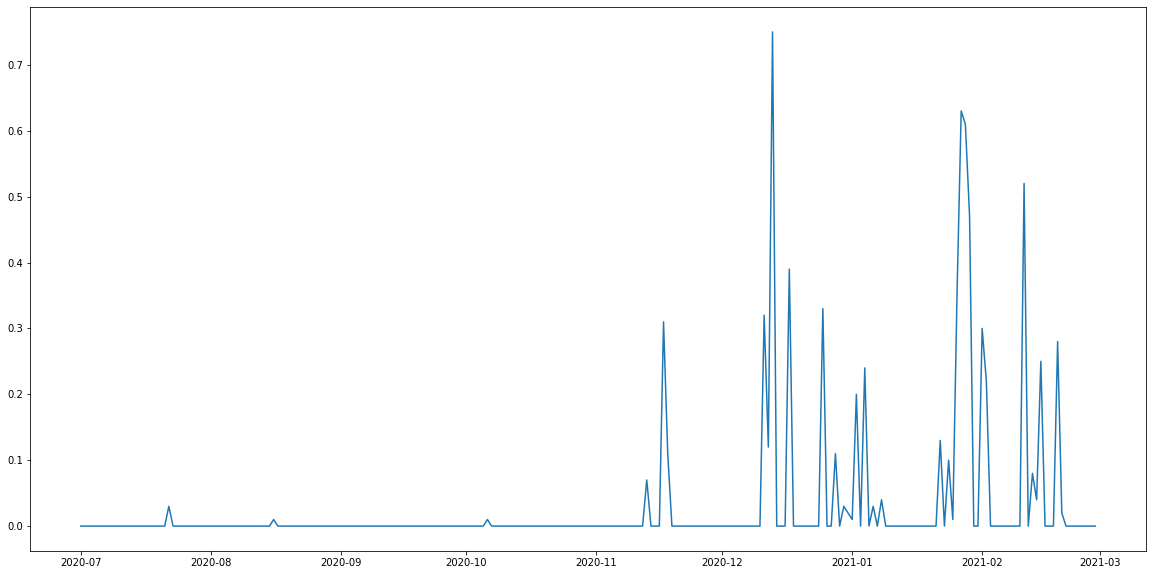

In [274]:
plt.figure(figsize=(20,10))
plt.plot(weather2['DATE'],weather2['PRCP'])
plt.show()

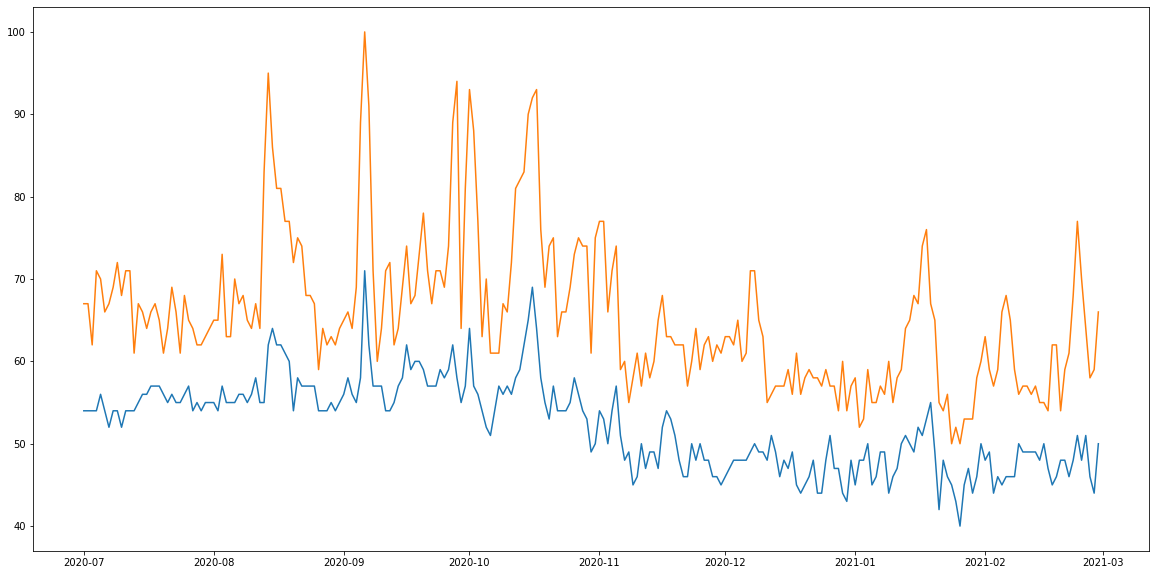

In [273]:
plt.figure(figsize=(20,10))
plt.plot(weather2['DATE'],weather2['TMIN'])
plt.plot(weather2['DATE'],weather2['TMAX'])
plt.show()

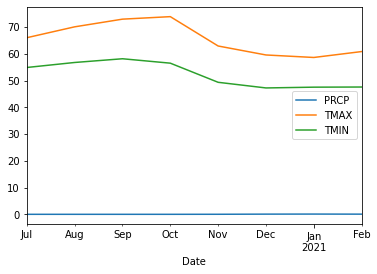

In [285]:
weathermonthly.plot()

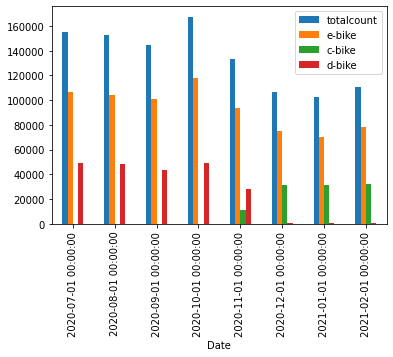

In [262]:
monthlycount.plot.bar()

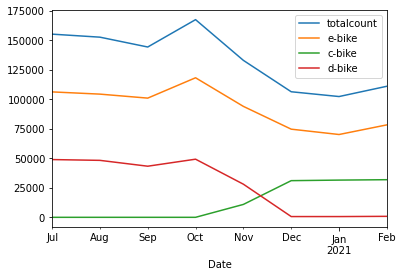

In [242]:
monthlycount.plot()

In [248]:
weather2['DATE'] = pd.to_datetime(weather2['DATE'])
weather2['DATE']

182   2020-07-01
183   2020-07-02
184   2020-07-03
185   2020-07-04
186   2020-07-05
         ...    
420   2021-02-24
421   2021-02-25
422   2021-02-26
423   2021-02-27
424   2021-02-28
Name: DATE, Length: 243, dtype: datetime64[ns]

In [246]:
dailycount['DATE']

0     2020-07-01
1     2020-07-02
2     2020-07-03
3     2020-07-04
4     2020-07-05
         ...    
238   2021-02-24
239   2021-02-25
240   2021-02-26
241   2021-02-27
242   2021-02-28
Name: DATE, Length: 243, dtype: datetime64[ns]

In [249]:
dailySF = dailycount.merge(weather2,left_on='DATE', right_on='DATE')
dailySF.head()

,DATE,totalcount,e-bike,c-bike,d-bike,month,year,Date,PRCP,TMAX,TMIN
0,2020-07-01,4698,3307,NaN,1391,7,2020,2020-07-01,0.0,67,54
1,2020-07-02,5030,3570,NaN,1460,7,2020,2020-07-01,0.0,67,54
2,2020-07-03,5174,3593,NaN,1581,7,2020,2020-07-01,0.0,62,54
3,2020-07-04,5847,3929,NaN,1918,7,2020,2020-07-01,0.0,71,54
4,2020-07-05,5099,3374,NaN,1725,7,2020,2020-07-01,0.0,70,56


In [250]:
dailySF['ebikeNom'] = dailySF['e-bike']/dailySF['totalcount']
dailySF['cbikeNom'] = dailySF['c-bike']/dailySF['totalcount']
dailySF['dbikeNom'] = dailySF['d-bike']/dailySF['totalcount']
dailySF.head()

,DATE,totalcount,e-bike,c-bike,d-bike,month,year,Date,PRCP,TMAX,TMIN,ebikeNom,cbikeNom,dbikeNom
0,2020-07-01,4698,3307,NaN,1391,7,2020,2020-07-01,0.0,67,54,0.703917,NaN,0.296083
1,2020-07-02,5030,3570,NaN,1460,7,2020,2020-07-01,0.0,67,54,0.709742,NaN,0.290258
2,2020-07-03,5174,3593,NaN,1581,7,2020,2020-07-01,0.0,62,54,0.694434,NaN,0.305566
3,2020-07-04,5847,3929,NaN,1918,7,2020,2020-07-01,0.0,71,54,0.671969,NaN,0.328031
4,2020-07-05,5099,3374,NaN,1725,7,2020,2020-07-01,0.0,70,56,0.661698,NaN,0.338302


In [251]:
dailySF[['totalcount','PRCP', 'TMAX', 'TMIN',
       'ebikeNom', 'cbikeNom','dbikeNom']].corr()

,totalcount,PRCP,TMAX,TMIN,ebikeNom,cbikeNom,dbikeNom
totalcount,1.000000,-0.465159,0.607926,0.566194,-0.315385,-0.177652,0.661440
PRCP,-0.465159,1.000000,-0.303188,-0.239195,0.229972,-0.013744,-0.308152
TMAX,0.607926,-0.303188,1.000000,0.776467,-0.124983,-0.039619,0.554357
TMIN,0.566194,-0.239195,0.776467,1.000000,-0.121576,-0.162713,0.773755
ebikeNom,-0.315385,0.229972,-0.124983,-0.121576,1.000000,-0.517981,-0.090602
cbikeNom,-0.177652,-0.013744,-0.039619,-0.162713,-0.517981,1.000000,-0.975970
dbikeNom,0.661440,-0.308152,0.554357,0.773755,-0.090602,-0.975970,1.000000


In [252]:

from sklearn.linear_model import LinearRegression

In [253]:
lm = LinearRegression(fit_intercept=True).fit(dailySF[['dbikeNom']], dailySF['TMIN'])
lm.coef_, lm.intercept_

(array([28.34169279]), 47.15227610377159)

In [254]:
#alternative implementation with fomulae
lm = smf.ols(formula='dbikeNom~TMIN', data = dailySF).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:               dbikeNom   R-squared:                       0.599
Model:                            OLS   Adj. R-squared:                  0.597
Method:                 Least Squares   F-statistic:                     359.5
Date:                Thu, 29 Apr 2021   Prob (F-statistic):           1.09e-49
Time:                        16:58:27   Log-Likelihood:                 235.86
No. Observations:                 243   AIC:                            -467.7
Df Residuals:                     241   BIC:                            -460.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.9235      0.059    -15.774      0.0

In [255]:
lm.rsquared

0.5986970013944737

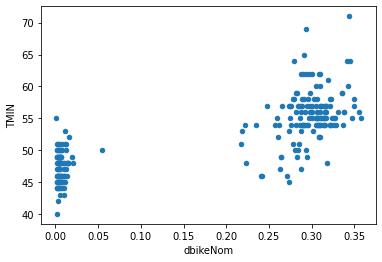

In [256]:
dailySF.plot(x='dbikeNom',y='TMIN',kind='scatter')

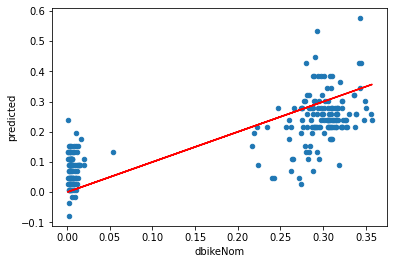

In [257]:
lm = smf.ols(formula='dbikeNom~TMIN', data = dailySF).fit()
dailySF['predicted']=lm.predict()
fig, ax = plt.subplots() #get axis to plot on
dailySF.plot(ax=ax,kind='scatter',x='dbikeNom', y= 'predicted') #show the data
ax.plot(dailySF['dbikeNom'],dailySF['dbikeNom'],'r-'); #show the regression line

In [258]:
#alternative implementation with fomulae
lm = smf.ols(formula='totalcount~TMAX', data = dailySF).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:             totalcount   R-squared:                       0.370
Model:                            OLS   Adj. R-squared:                  0.367
Method:                 Least Squares   F-statistic:                     141.3
Date:                Thu, 29 Apr 2021   Prob (F-statistic):           6.02e-26
Time:                        17:00:15   Log-Likelihood:                -1993.6
No. Observations:                 243   AIC:                             3991.
Df Residuals:                     241   BIC:                             3998.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -510.9643    418.277     -1.222      0.2

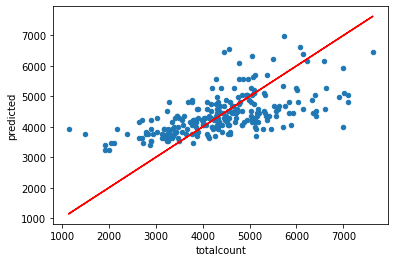

In [260]:
lm = smf.ols(formula='totalcount~TMAX', data = dailySF).fit()
dailySF['predicted']=lm.predict()
fig, ax = plt.subplots() #get axis to plot on
dailySF.plot(ax=ax,kind='scatter',x='totalcount', y= 'predicted') #show the data
ax.plot(dailySF['totalcount'],dailySF['totalcount'],'r-'); #show the regression line